<a href="https://colab.research.google.com/github/3thanhoeft/NLP_Exercise_1/blob/main/Assignment_1_Ethan_Mar_Anna_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1: Zipf's Law of Abbreviation (code)

## by Anna Calonge, Ethan Hoeft, Mar Segalés

### Leaves of Grass by Walt Whitman:

In the first place, we have to import the 're' module to be able to use regular expressions:

In [ ]:
import re

Next, in order to have access to the text in our .txt file (which we downloaded from ProjectGutenberg website) we use Python's open() function on read mode (hence the 'r'). We assign the action performed by this function to a new variable which we decide to call "newfile". Since the original file (leavesofgrass.txt) may contain some special characters, we remove them by opening the file specifying the encoding: utf-8.

In [ ]:
newfile = open("leavesofgrass.txt",'r', encoding='utf-8')

Now, we assign all the content of our document to the new variable "entire_book" as a single string:

In [ ]:
entire_book = newfile.read()

We proceed to apply the .lower() function to our string ("entire_book") so that all the uppercased letters become lowercased and we assign this to the new variable "lower_case_text". We take this measure so that Python doesn't identify as different words those that begin with a capital letter (e.g. "the" and "The"):

In [ ]:
lower_case_text = entire_book.lower()

After that, we substitute all those characters that aren't alphanumerical (such as apostrophes, underscores, etc.) with a space by using the function re.sub() and the following regular expression: "[\W_]"

The exact meaning of each component in this regular expression is:
- "[]" represent a set of characters to match
- "\W" matches all those non-alphanumerical characters, without taking into account the underscore, hence:
- we add "_" within the set so it takes this symbol into account

We incorporate the text with all these new substitutions to the new variable "no_symbols":

In [ ]:
no_symbols = re.sub("[\W_]", " ", lower_case_text)

We now proceed to apply the re.findall() function to our "no_symbols" string with the regular expression "\b[\w]+\b" in order to find each isolated word that the text contains. Since the output of the function used is always list, the variable "list_text" is NOT a string like the previous variables; it's a list consisting on all the words and numbers in the text.

The exact meaning of each component in this regular expression is:
- "[]" represent a set of characters to match
- "\w" is a character class that matches all alphanumerical characters and underscores (but let's remember that we removed all underscores in the previous step)
- after the set "[\w]" we add the symbol "+", which greedily matches the expression to its left 1 or more times. We use the "+" symbol because all words have at least one letter
- "\b" matches the boundary (or empty string) at the start and end of a word, that's why we put it both at the beginning and at the end of our regular expression

Note that we add an 'r' before the regular expression, which denotes "raw string", and it is used to avoid scape characters such as "b" (backspace):

In [ ]:
list_text = re.findall(r"\b[\w]+\b", no_symbols)

After that, we create an empty dictionary named "dict_count":

In [ ]:
dict_count = {}

For every word (for every x) present in the variable "list_text" created two steps before, we tell the program to:
- in the case that the word (if...) is NOT found in the dictionary, create a new key under the name of that same word and assign it a value of 1.
- in the case that the previous condition is not fulfilled (else...), add 1 to the preexistent value of the key associated to that word.

For example:
Let's imagine our text begins with the word "the". When the loop starts running, since "the" isn't yet present in our dictionary, the first condition is satisfied and therefore a new key with the name "the" is created and assigned a value of 1. Later on, whenever the loop encounters another "the", the second condition is satisfied and, therefore, 1 is added to the preexistent value, which will now remain as 2 until the loop finds another "the":

In [ ]:
for x in list_text:
    if x not in dict_count:
        dict_count[x] = 1
    else:
        dict_count[x] = dict_count[x] + 1

Finally, to be able to display our dictionary from most frequent words to less frequent words, we import the module "operator" and, then, from this module, we import the function .itemgetter(), which allows us to arrange the dictionary according to either keys or values.
We apply the function sorted() to our dictionary (and add dict() to it because both our input and output are dictionaries) and we assign this to the new variable "arranged_dict_count".
Since we want our dictionary sorted according to our values, we put "1" inside the parenthesis of our function .itemgetter() (i.e. "itemgetter(1)") instead of 0 (which would sort the dictionary by its keys).
This function is predetermined to arrange from lower to higher in the case of numbers, and since we want the most frequent words to be displayed at the beginning, we need to reverse this. That's why add the following: reverse=True.

In [ ]:
import operator
from operator import itemgetter
arranged_dict_count = dict(sorted(dict_count.items(), key=operator.itemgetter(1), reverse=True))

In [ ]:
print(arranged_dict_count)

{'the': 10115, 'and': 5336, 'of': 4265, 'i': 2934, 'to': 2244, 'in': 1875, 'd': 1579, 'you': 1537, 'a': 1293, 'with': 1250, 'is': 1109, 'all': 1074, 'my': 1014, 'me': 1010, 'or': 1003, 'for': 993, 'not': 877, 'that': 855, 'as': 817, 'it': 794, 'from': 703, 'on': 671, 'o': 629, 'are': 612, 's': 598, 'be': 501, 'by': 490, 'what': 480, 'they': 480, 'at': 473, 'them': 444, 'but': 435, 'see': 432, 'his': 375, 'your': 365, 'have': 361, 'their': 359, 'one': 355, 'we': 334, 'these': 313, 'he': 303, 'now': 299, 'this': 297, 'no': 284, 'out': 284, 'old': 278, 'love': 275, 'there': 273, 'will': 273, 'nor': 271, 'life': 268, 'day': 265, 'through': 265, 'shall': 263, 'yet': 262, 'thee': 261, 'so': 254, 'long': 253, 'more': 253, 'soul': 249, 'do': 247, 'earth': 246, 'man': 243, 'am': 240, 'here': 237, 'its': 237, 'how': 230, 'night': 226, 'thy': 226, 'where': 221, 'than': 220, 'who': 219, 'any': 210, 'thou': 209, 'men': 199, 'over': 195, 'him': 194, 'sea': 192, 'was': 192, 'death': 190, 'up': 190, '

### Calculating the means:

In order to calculate the mean of the word lengths, in the first place, we need to obtain a list with the lengths of the 12400 words we have in our first sample. To do so, we create an empty list and then apply a loop which will append the length of each key of our 'arranged_dict_count' dictionary to the new list:

In [ ]:
word_lengths_list = []

In [ ]:
for x in arranged_dict_count:
    word_lengths_list.append(len(x))
len(word_lengths_list)

12400

Then, we create a new list corresponding to just the 50 first words by adscribing the 50 first elements of the list "word_lengths_list" to a new list. To calculate the mean, we use the function sum() applied to our new list of 50 items and then divide it by the length of this list (50).

50 first and 50 last words - means:

In [ ]:
word_length_50_first_list = word_lengths_list[0:50]
sum(word_length_50_first_list) / len(word_length_50_first_list)

2.82

We do the same thing but for the last 50 elements:

In [ ]:
word_length_50_last_list = word_lengths_list[-50:]
sum(word_length_50_last_list) / len(word_length_50_last_list)

7.52

### Creating the graph:

To be able to create graphs in Python, we import the library 'matplotlib.pyplot' under the abbreviation 'plt'. Next, we create the list that will appear on the x axis and that corresponds to the names of the categories the PoS tagger identified. We do the same thing for the y axis, where the frequency of each category will figure.

In [ ]:
wordlength_list = []
for x in arranged_dict_count:
    wordlength_list.append(len(x))

We only wish to display the first 100 most common words:

In [ ]:
wordlength_list_250 = wordlength_list[0:250]

In [ ]:
rank_list = []
for x in range(1,251):
    string = "rank " + str(x)
    rank_list.append(string)

In [ ]:
import matplotlib.pyplot as plt

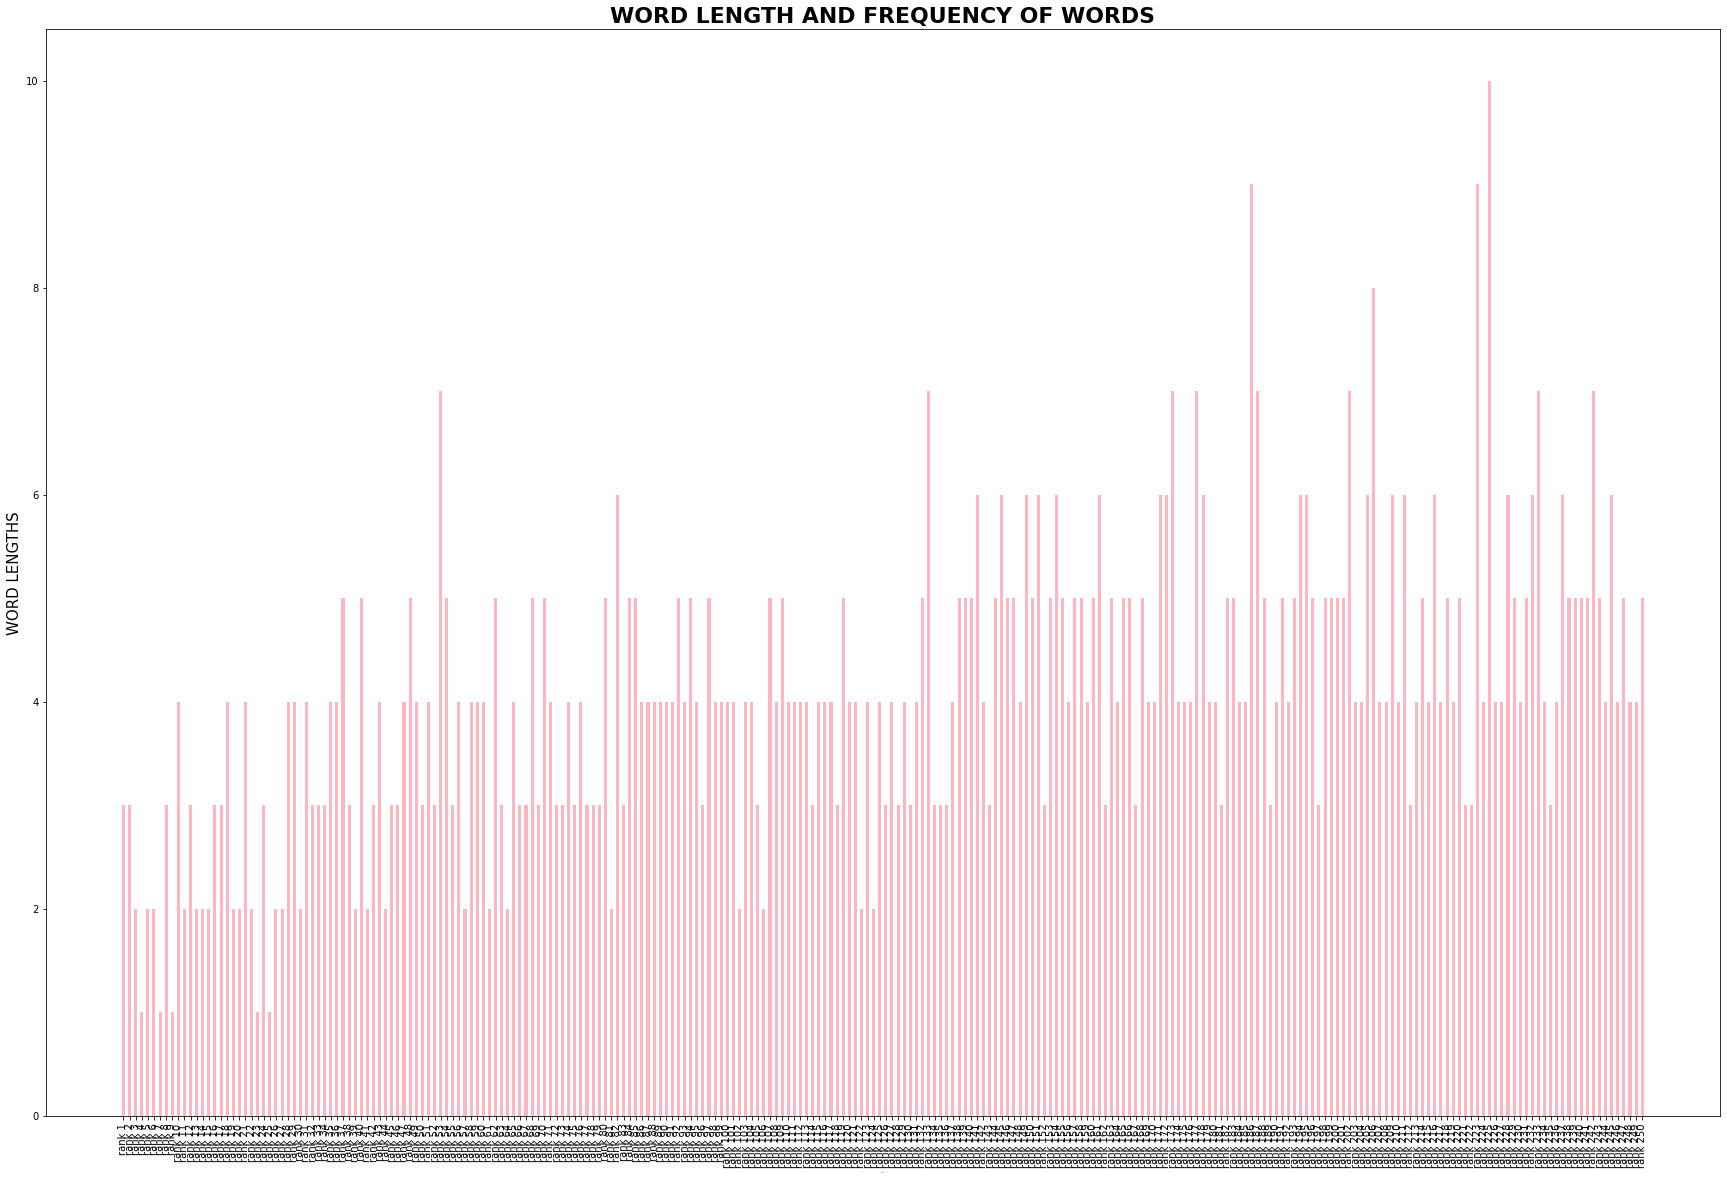

In [ ]:
fig = plt.figure(figsize=(30,20))
plt.bar(rank_list, wordlength_list_250, width = 0.5, color="lightpink")
plt.xticks(rotation = 90);
plt.title("WORD LENGTH AND FREQUENCY OF WORDS", size=22, fontweight = 'bold')
plt.xlabel("RANKS", size=1)
plt.ylabel("WORD LENGTHS", size=15);

### Azul by Rubén Darío

All the explanations for this part are the same as in the previous one.

In [ ]:
myfile = open("azul.txt",'r', encoding='utf-8')

In [ ]:
entire_book = myfile.read()

In [ ]:
lower_case_text = entire_book.lower()

In [ ]:
no_symbols = re.sub("[\W_]", " ", lower_case_text)

In [ ]:
list_text = re.findall(r"\b[\w]+\b", no_symbols)

In [ ]:
dict_count = {}
for x in list_text:
    if x not in dict_count:
        dict_count[x] = 1
    else:
        dict_count[x] = dict_count[x] + 1

In [ ]:
import operator
from operator import itemgetter
arranged_dict_count = dict(sorted(dict_count.items(), key=operator.itemgetter(1), reverse=True))

### Calculating the means:

In [ ]:
word_lengths_list = []
for x in arranged_dict_count:
    word_lengths_list.append(len(x))
len(word_lengths_list)

6923

In [ ]:
### 50 first and 50 last words - means:

In [ ]:
word_length_50_first_list = word_lengths_list[0:50]
sum(word_length_50_first_list) / len(word_length_50_first_list)

3.0

In [ ]:
word_length_50_last_list = word_lengths_list[-50:]
sum(word_length_50_last_list) / len(word_length_50_last_list)

7.0

### Creating the graph:

In [ ]:
wordlength_list = []
for x in arranged_dict_count:
    wordlength_list.append(len(x))

In [ ]:
wordlength_list_250 = wordlength_list[0:250]

In [ ]:
rank_list = []
for x in range(1,251):
    string = "rank " + str(x)
    rank_list.append(string)

In [ ]:
import matplotlib.pyplot as plt

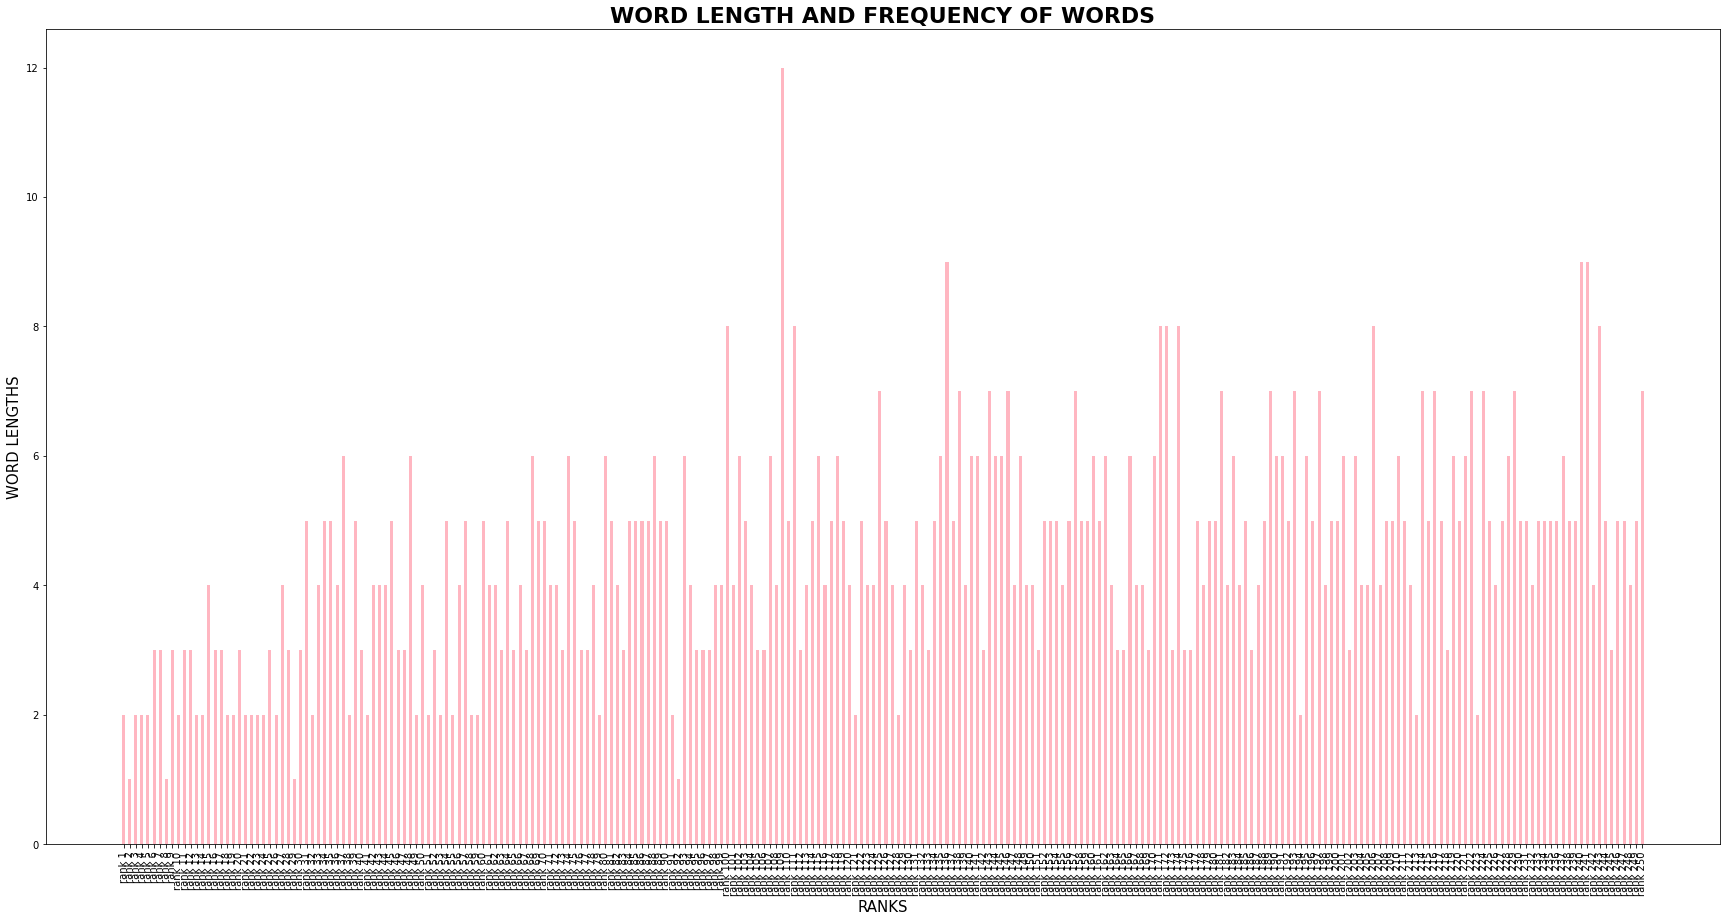

In [ ]:
fig = plt.figure(figsize=(30,15))
plt.bar(rank_list, wordlength_list_250, width = 0.5, color="lightpink")
plt.xticks(rotation = 90);
plt.title("WORD LENGTH AND FREQUENCY OF WORDS", size=22, fontweight = 'bold')
plt.xlabel("RANKS", size=15)
plt.ylabel("WORD LENGTHS", size=15);